In [151]:
import numpy as np
import pandas as pd

In [152]:
df = pd.read_csv('winequality-red.csv')

In [153]:
# main stats of df
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [154]:
# information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [155]:
# median
median = df.median()
median

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [156]:
# sum of missing entries
sum = df.isnull().sum(axis=0)
sum

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [157]:
# drop missing data row
df = df.dropna()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


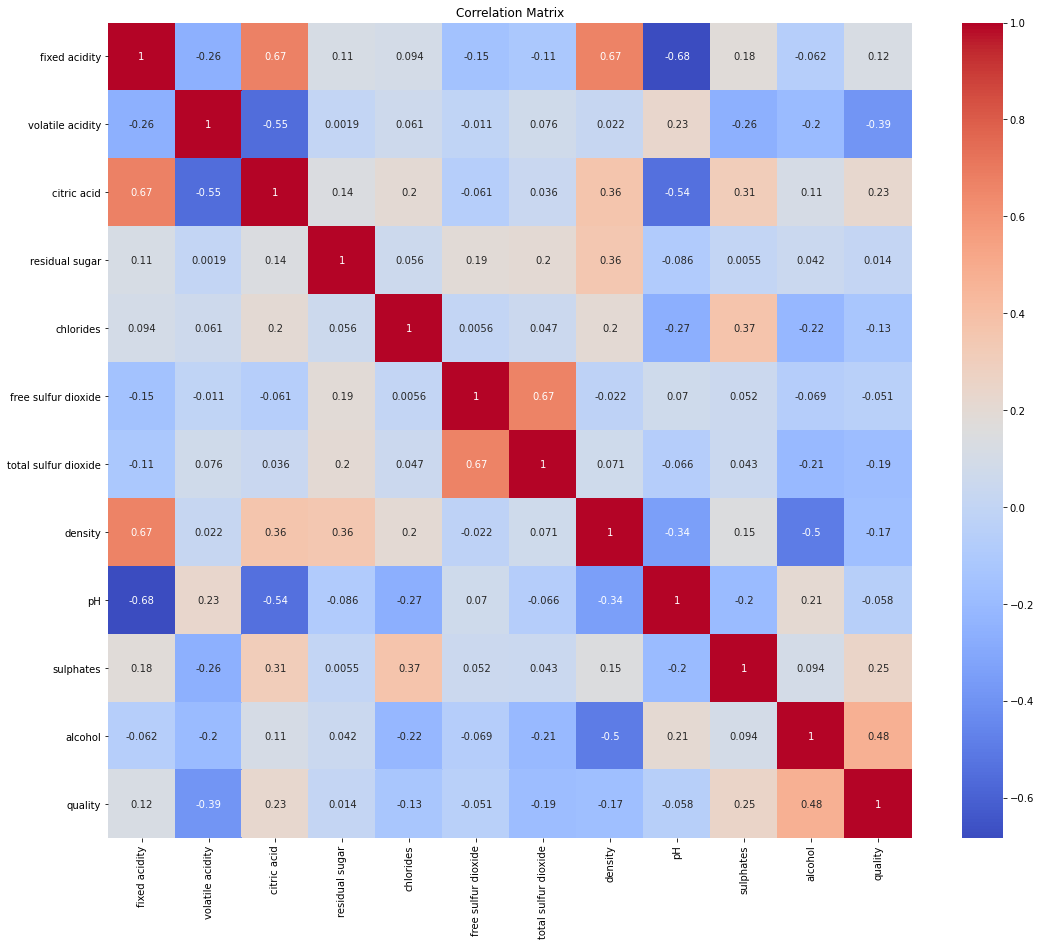

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Matrix")
plt.show()

In [159]:
# X (input) select the most relevant columns as features 
# y (target) select quality as target
y = df[df.columns[-1]]
X = df[df.columns[[0,2,3,9,10]]]
X

,fixed acidity,citric acid,residual sugar,sulphates,alcohol
0,7.4,0.00,1.9,0.56,9.4
1,7.8,0.00,2.6,0.68,9.8
2,7.8,0.04,2.3,0.65,9.8
3,11.2,0.56,1.9,0.58,9.8
4,7.4,0.00,1.9,0.56,9.4
...,...,...,...,...,...
1594,6.2,0.08,2.0,0.58,10.5
1595,5.9,0.10,2.2,0.76,11.2
1596,6.3,0.13,2.3,0.75,11.0
1597,5.9,0.12,2.0,0.71,10.2


In [160]:
# split data to 80/20
rows = df.shape[0]
size = round(rows*0.8)

X_train = X.iloc[:size]
X_test = X.iloc[size:]
y_train = y.iloc[:size]
y_test = y.iloc[size:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1279, 5)
y_train shape: (1279,)
X_test shape: (320, 5)
y_test shape: (320,)


In [161]:
# close form solution
xtx = np.linalg.inv(np.dot(X_train.T, X_train))
xty = np.dot(X_train.T, y_train)
weight = np.dot(xtx, xty)
weight

array([ 0.07730547, -0.03502008, -0.02035649,  0.83429454,  0.43284609])

In [162]:
# make prediction using weight
y_pred = np.dot(X_test, weight)

# get mse
sum = 0.0
y_test = y_test.reset_index(drop=True)
for i in range(len(y_test)):
    sum += (y_test[i] - y_pred[i]) ** 2

mse = sum / len(y_test)
print("MSE:", mse)



MSE: 0.48431819429635886


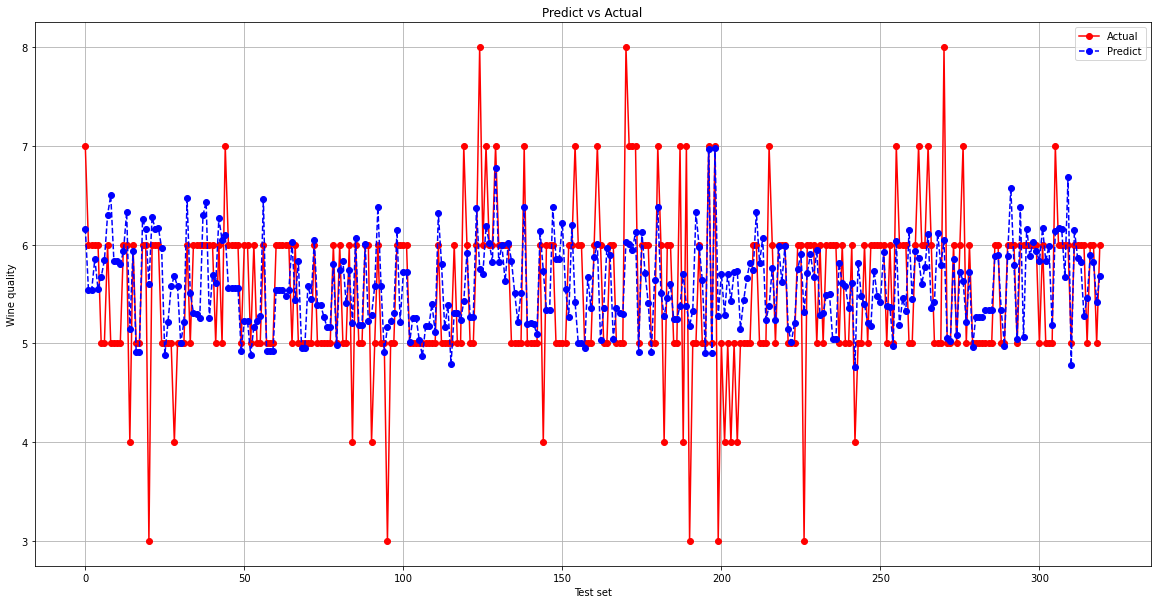

In [163]:
# plot
index = range(len(y_test))

plt.figure(figsize=(20, 10))
plt.plot(index, y_test, label='Actual', marker='o', color='red')
plt.plot(index, y_pred, label='Predict', marker='o', linestyle='--', color='blue')

plt.xlabel('Test set')
plt.ylabel('Wine quality')
plt.title('Predict vs Actual')
plt.legend()

plt.grid()
plt.show()

